In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, confusion_matrix, accuracy_score, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree
from sklearn.tree import export_graphviz
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import label_binarize
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/TES Project/Condo2.csv")
df.head()

,Location (Kuala Lumpur),Rooms,Bathrooms,Car Parks,Furnishing,Property Details,Size Type,Size Number (sq. ft.),Price Range
0,33,3,2.0,1.0,1,3,0,805.0,Low
1,38,3,2.0,1.0,2,3,0,850.0,Low
2,38,3,2.0,1.0,2,3,0,850.0,Low
3,33,3,2.0,1.0,2,3,0,802.0,Low
4,33,3,2.0,1.0,2,3,0,850.0,Low


In [ ]:
X = df.drop('Price Range', axis=1)  # Features
y = df['Price Range']              # Target

le = LabelEncoder()
X['Location (Kuala Lumpur)'] = le.fit_transform(X['Location (Kuala Lumpur)'])
X['Furnishing'] = le.fit_transform(X['Furnishing'])
X['Property Details'] = le.fit_transform(X['Property Details'])
X['Size Type'] = le.fit_transform(X['Size Type'])

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,
                                   test_size =0.2,
                                  random_state=42)

X_train,X_valid,y_train,y_valid=train_test_split( X_train,y_train,
                                   test_size =0.25,
                                  random_state=42)

In [ ]:
print("X_train Shape: ",X_train.shape)
print("y_train Shape: ",y_train.shape)
print()
print("X_test Shape: ",X_test.shape)
print("y_test Shape: ",y_test.shape)
print()
print("X_valid Shape: ",X_valid.shape)
print("y_valid Shape: ",y_valid.shape)

X_train Shape:  (10998, 8)
y_train Shape:  (10998,)

X_test Shape:  (3667, 8)
y_test Shape:  (3667,)

X_valid Shape:  (3667, 8)
y_valid Shape:  (3667,)


In [ ]:
# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [ ]:
# Random Forest
clf = RandomForestClassifier(
    n_estimators=1000,
    criterion='entropy',
    max_depth=100,
    min_samples_split=3,
    min_samples_leaf=2,
    max_features='sqrt',
    bootstrap=True,
    random_state=42
)

clf.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=100, min_samples_leaf=2,
                       min_samples_split=3, n_estimators=1000, random_state=42)

In [ ]:
y_pred_train = clf.predict(X_train)

y_pred_test = clf.predict(X_test)

y_pred_valid = clf.predict(X_valid)

In [ ]:
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)
valid_accuracy = accuracy_score(y_valid, y_pred_valid)

print("Train Accuracy: ", train_accuracy*100)
print("Test Accuracy: ", test_accuracy*100)
print("Valid Accuracy: ", valid_accuracy*100)

Train Accuracy:  90.18912529550828
Test Accuracy:  79.13826015816744
Valid Accuracy:  79.60185437687483


In [ ]:
print(classification_report(y_test,y_pred_test,labels= clf.classes_.tolist()))

                precision    recall  f1-score   support

Extremely High       0.87      0.89      0.88       903
          High       0.74      0.73      0.74       913
           Low       0.81      0.86      0.84       909
        Medium       0.73      0.69      0.71       942

      accuracy                           0.79      3667
     macro avg       0.79      0.79      0.79      3667
  weighted avg       0.79      0.79      0.79      3667



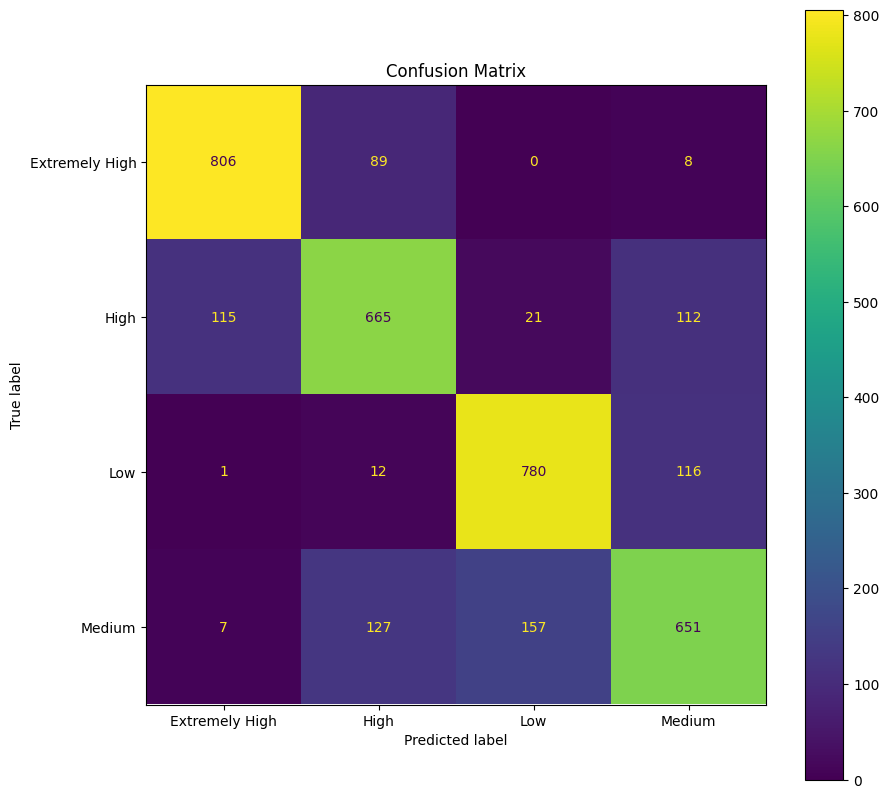

In [ ]:
class_names = clf.classes_.tolist()

cm = confusion_matrix(y_test,y_pred_test,labels = clf.classes_.tolist())

disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels= class_names)

fig, ax = plt.subplots(figsize=(10,10))
ax.set_title('Confusion Matrix')
disp.plot(ax=ax)
plt.show()

In [ ]:
y_test_encoded = le.fit_transform(y_test)
y_pred_test_encoded = le.transform(y_pred_test)

y_pred_test_proba = clf.predict_proba(X_test)

print(roc_auc_score(y_test_encoded, y_pred_test_proba, multi_class='ovo'))

0.9456351728487215


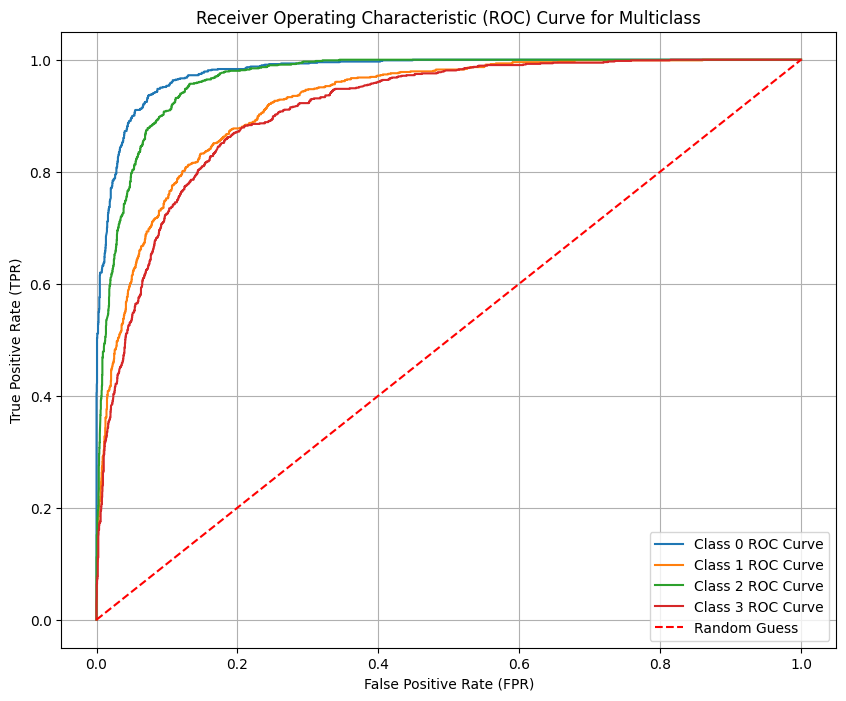

In [ ]:
y_test_binarized = label_binarize(y_test_encoded, classes=range(len(set(y_test_encoded))))

# Plot ROC curve for each class
plt.figure(figsize=(10, 8))
for i in range(y_test_binarized.shape[1]):
    fpr, tpr, thresholds = roc_curve(y_test_binarized[:, i], y_pred_test_proba[:, i])
    plt.plot(fpr, tpr, label=f'Class {i} ROC Curve')

# Plot diagonal
plt.plot([0, 1], [0, 1], linestyle='--', color='red', label='Random Guess')

# Plot settings
plt.title('Receiver Operating Characteristic (ROC) Curve for Multiclass')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.legend(loc='lower right')
plt.grid()
plt.show()

In [ ]:
print(classification_report(y_valid,y_pred_valid,labels= clf.classes_.tolist()))

                precision    recall  f1-score   support

Extremely High       0.85      0.89      0.87       886
          High       0.77      0.76      0.77       927
           Low       0.82      0.84      0.83       952
        Medium       0.73      0.70      0.72       902

      accuracy                           0.80      3667
     macro avg       0.79      0.80      0.80      3667
  weighted avg       0.79      0.80      0.79      3667



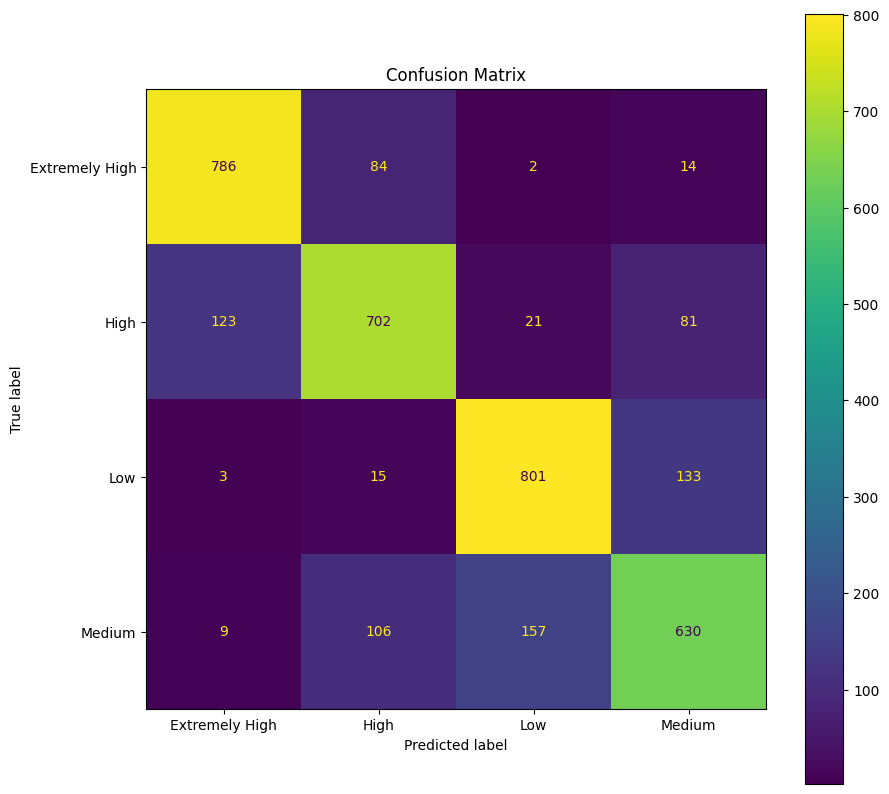

In [ ]:
cm = confusion_matrix(y_valid,y_pred_valid,labels = clf.classes_.tolist())

disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels= class_names)

fig, ax = plt.subplots(figsize=(10,10))
ax.set_title('Confusion Matrix')
disp.plot(ax=ax)

In [ ]:
y_valid_encoded = le.fit_transform(y_valid)
y_pred_valid_encoded = le.transform(y_pred_valid)

y_pred_valid_proba = clf.predict_proba(X_valid)

print(roc_auc_score(y_valid_encoded, y_pred_valid_proba, multi_class="ovo"))

0.9478679875478654


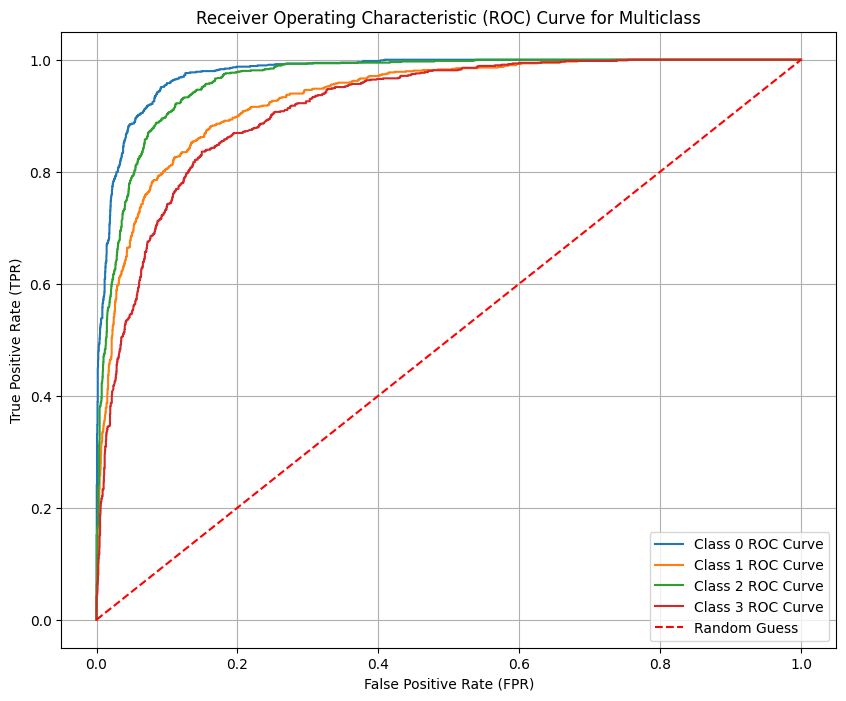

In [ ]:
y_valid_binarized = label_binarize(y_valid_encoded, classes=range(len(set(y_valid_encoded))))

# Plot ROC curve for each class
plt.figure(figsize=(10, 8))
for i in range(y_test_binarized.shape[1]):
    fpr, tpr, thresholds = roc_curve(y_valid_binarized[:, i], y_pred_valid_proba[:, i])
    plt.plot(fpr, tpr, label=f'Class {i} ROC Curve')

# Plot diagonal
plt.plot([0, 1], [0, 1], linestyle='--', color='red', label='Random Guess')

# Plot settings
plt.title('Receiver Operating Characteristic (ROC) Curve for Multiclass')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.legend(loc='lower right')
plt.grid()
plt.show()

Single tree plot saved at: /content/drive/MyDrive/Colab Notebooks/Data Mining/Project/random_forest_single_tree_plot.png


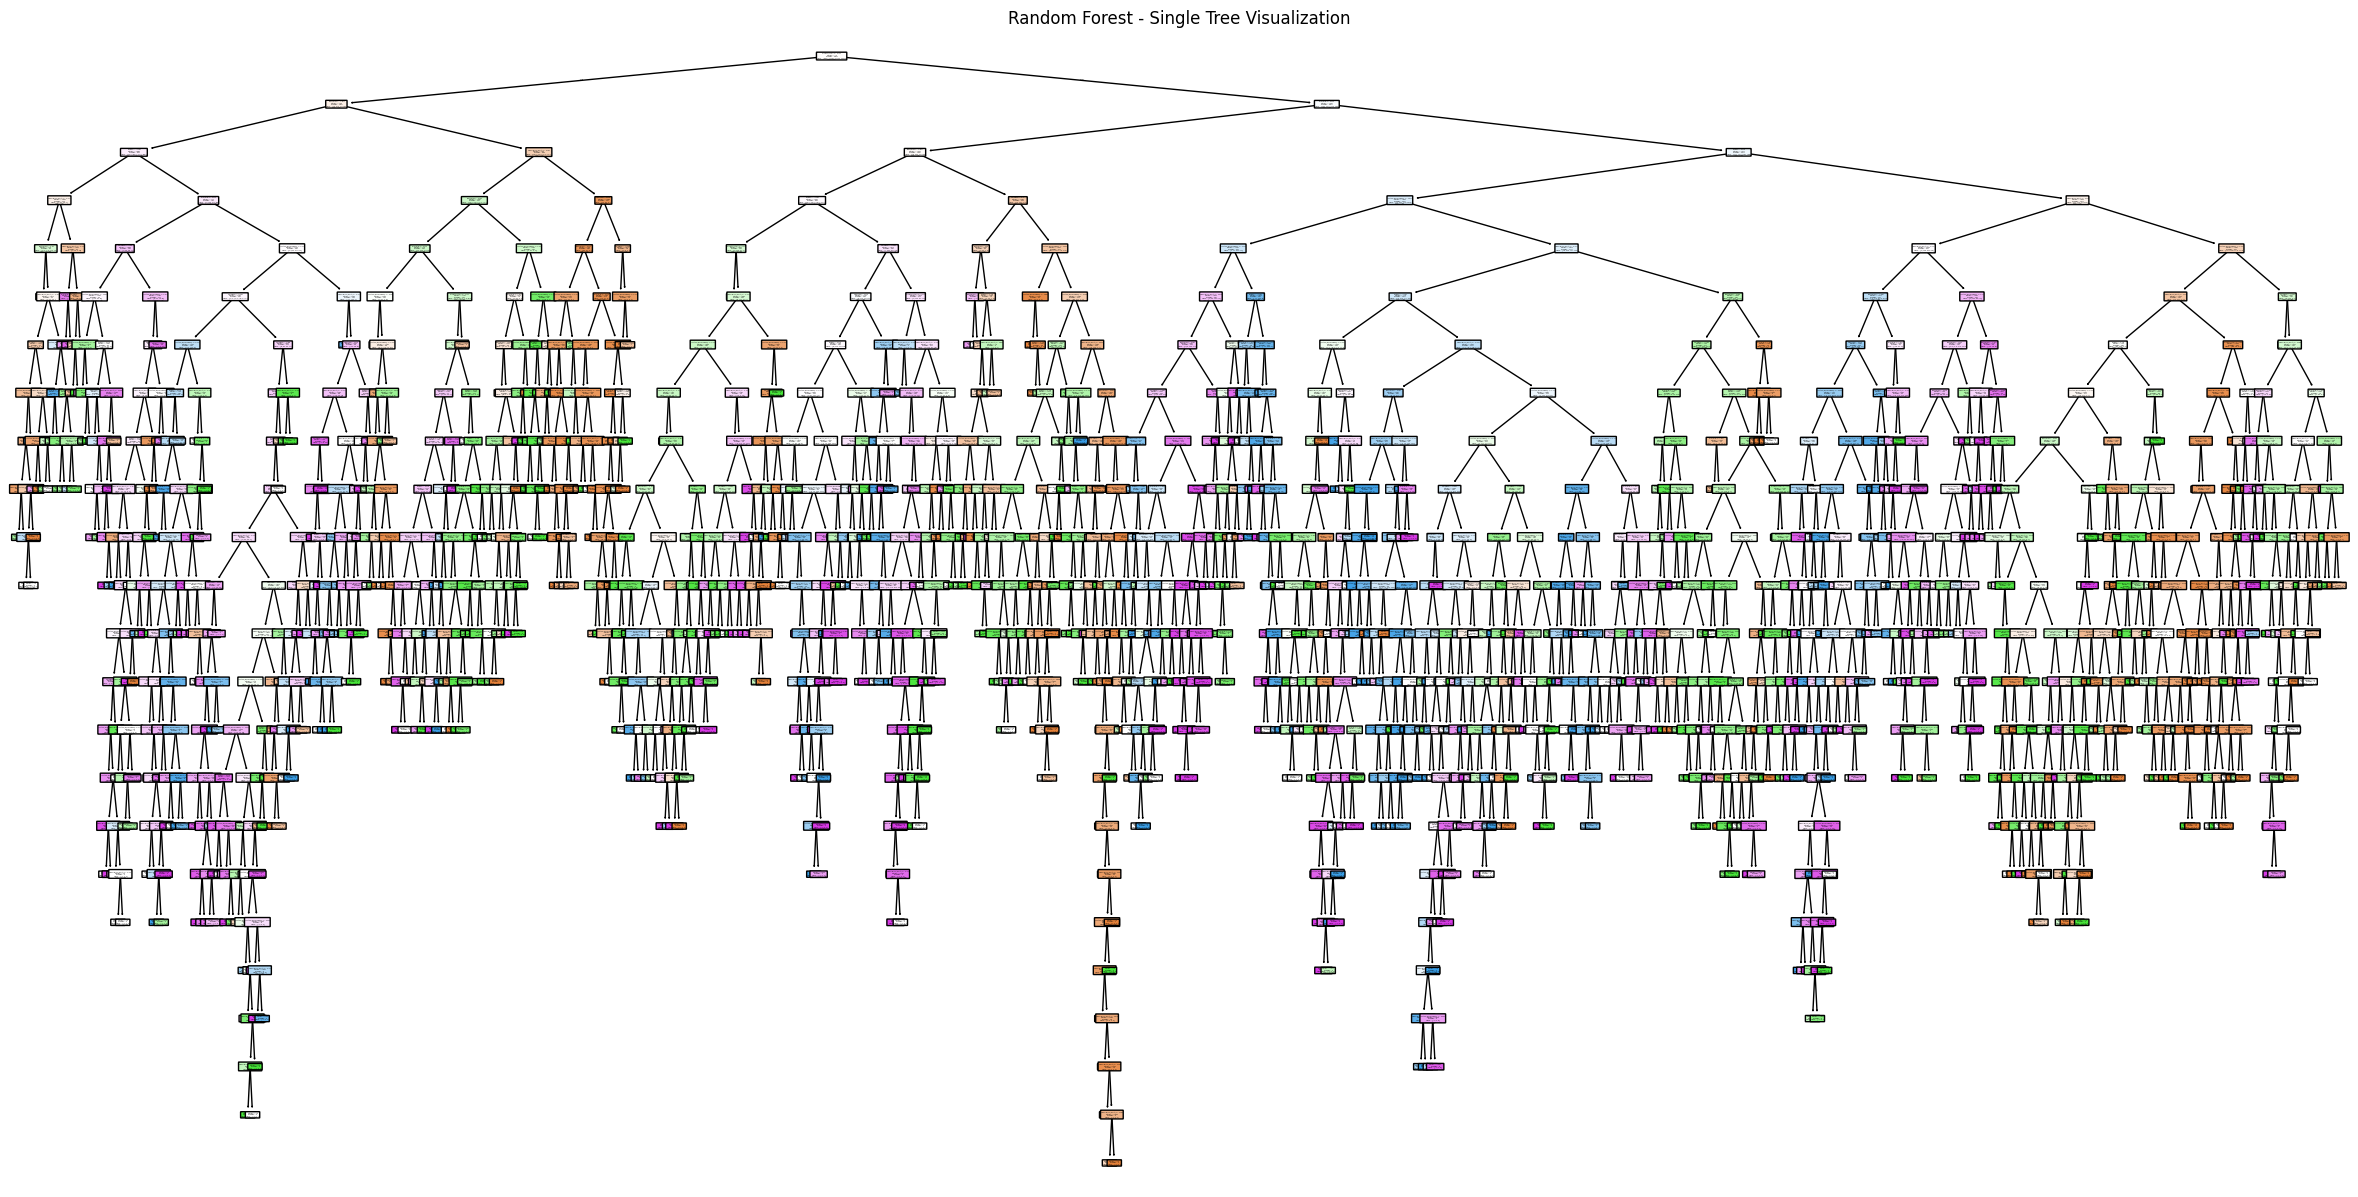

In [ ]:
single_tree = clf.estimators_[0]


feature_names = X.columns if isinstance(X, pd.DataFrame) else None
class_names = y.unique().astype(str)  # Convert class names to strings

# Visualize the tree
plt.figure(figsize=(30, 15))
plot_tree(
    single_tree,
    feature_names=feature_names,  # Correctly pass column names if available
    class_names=class_names,      # Correctly pass class names
    filled=True,
    rounded=True
)
plt.title("Random Forest - Single Tree Visualization")

# Save the plot
save_path = '/content/drive/MyDrive/Colab Notebooks/Data Mining/Project/random_forest_single_tree_plot.png'
plt.savefig(save_path, format='png', bbox_inches='tight')
print(f"Single tree plot saved at: {save_path}")

# Show the plot
plt.show()


Feature importance plot saved at: /content/drive/MyDrive/Colab Notebooks/Data Mining/Project/random_forest_feature_importance.png


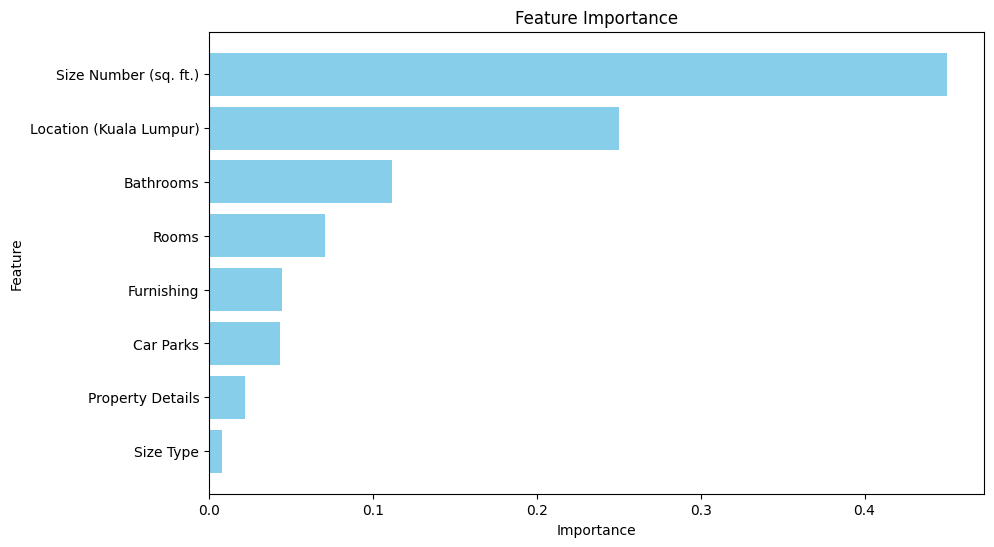

In [ ]:
feature_importances = clf.feature_importances_

# Create a DataFrame for visualization
feature_names = X.columns if isinstance(X, pd.DataFrame) else [f'Feature {i}' for i in range(X_train.shape[1])]
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.gca().invert_yaxis()
plt.title("Feature Importance")
plt.xlabel("Importance")
plt.ylabel("Feature")

# Save the plot
save_path = '/content/drive/MyDrive/Colab Notebooks/Data Mining/Project/random_forest_feature_importance.png'
plt.savefig(save_path, format='png', bbox_inches='tight')
print(f"Feature importance plot saved at: {save_path}")

# Show the plot
plt.show()


In [ ]:
save_path = '/content/drive/MyDrive/Colab Notebooks/Data Mining/Project/random_forest_model.joblib'

joblib.dump(clf, save_path)

print(f"Best Random Forest model saved to: {save_path}")

Best Random Forest model saved to: /content/drive/MyDrive/Colab Notebooks/Data Mining/Project/random_forest_model.joblib
